<a href="https://colab.research.google.com/github/NasserKishek/Adult-Income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Adults Income

- Author: Nasser Kishek

## Load and Explore the Data

In [79]:
# Core and Vizualzation imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Modeling imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error,
accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
recall_score, precision_score, classification_report)


from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
fpath = "/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Week17/Data/Adult-Income dataset.csv"
df = pd.read_csv(fpath)

In [82]:
# Preview the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [83]:
# Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We have 15 coulmns:
- 6 integers
- 9 categorical

In [84]:
df.duplicated().sum()

np.int64(52)

We have 52 duplicated data we should drop.

In [85]:
duplicated_rows = df.duplicated()
# Display duplicate rows
df[duplicated_rows]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [86]:
# Removing duplicated rows
df = df.drop_duplicates()

In [87]:
# check again the number of duplicated rows
df.duplicated().sum()

np.int64(0)

We dropped all the duplicated rows, so we can proceed.

In [88]:
# The count of missing values
missing = df.isna().sum()
# check the missing values in each column
missing

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


We do not have any missing values.

Now we will check for any consistent values in the categorical columns

In [89]:
# First, identify categorical columns
cat_cols = df.select_dtypes('object').columns

In [90]:
# Next, we will inspect categorical columns & address inconsistent Values
for col in cat_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value Counts for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


Value Counts for marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: 

From the above we noticed that some features contain the value ?, which could mean "Other", so we will change it in the following features:

- workclass
- occupation
- native-country

In [91]:
# Address the incosistent values in "workclass"
df['workclass'] = df['workclass'].replace({'?': 'other'})

In [92]:
# Check for "workclass" value counts
df['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
other,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [93]:
# now we will do the same for the other features
df['occupation'] = df['occupation'].replace({'?': 'other'})
df['native-country'] = df['native-country'].replace({'?': 'other'})

In [94]:
# Check for "occupation" value counts
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
other,2805
Transport-moving,2355


In [95]:
# Check for "native-country" value counts
df['native-country'].value_counts()

,count
native-country,
United-States,43792
Mexico,943
other,856
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


Now we will check for any impossible values in numeric columns

In [96]:
# Preview the summary of our numerical column
summary_stats = df.select_dtypes(include='number').describe()
summary_stats

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


There is no impossible values in the dataset.

## Explanatory Visualizations

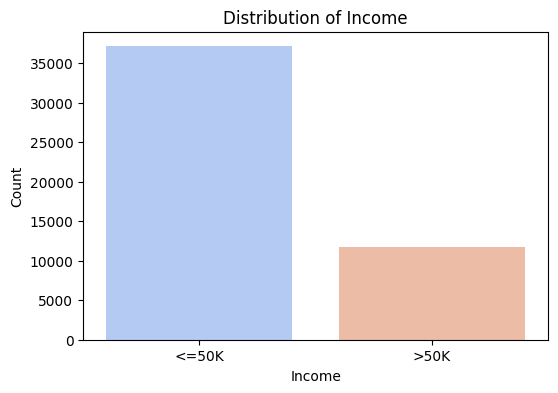

In [97]:
# Countplot for the target (Income)
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df, palette='coolwarm')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

**Insights:**

The chart shows that most individuals in the dataset earn ≤50K, while a much smaller portion earn >50K, indicating a clear class imbalance. This means the dataset is skewed toward lower-income individuals, which could bias a classification model if not addressed.

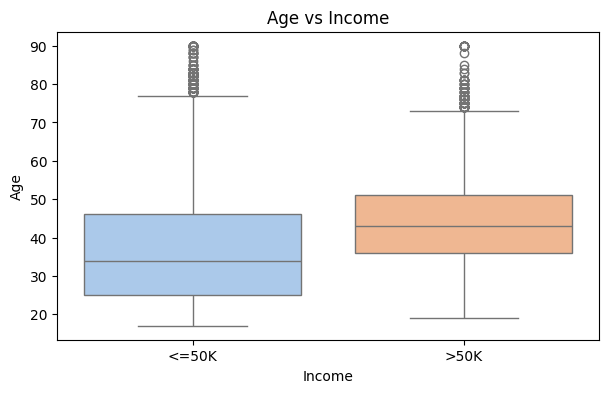

In [98]:
# age Vs. income
plt.figure(figsize=(7,4))
sns.boxplot(x='income', y='age', data=df, palette='pastel')
plt.title('Age vs Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

**Insights:**

The boxplot shows that individuals earning more than 50K tend to be older than adults who earn less or equal 50K. Which suggests that age is positively correlated with income, meaning older individuals are more likely to earn higher salaries.

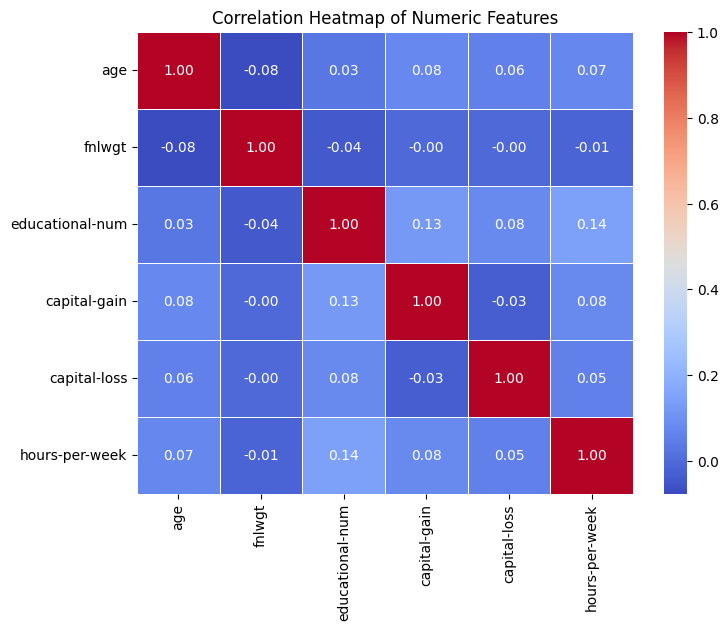

In [99]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # select numeric columns only
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Insights:**

The heatmap shows that most numeric features in the dataset have weak correlations with each other, suggesting low multicollinearity, which is a good sign for modeling.

## Preprocessing & Modeling

For this model we will use Random Forrest classifier Model

In [100]:
# Define the target and features
y = df['income']
X = df.drop(columns = 'income')
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [101]:
# preprocessing pipeline for numeric data
# save a list of columns names
num_cols = X_train.select_dtypes('number').columns
# instantiate preprocessors
scaler = StandardScaler()
# making a numeric tuple for columntransformer
num_tuple = ('numeric', scaler, num_cols)
num_tuple

('numeric',
 StandardScaler(),
 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

We have one ordinal feature which is "education"

In [102]:
# Define ordinal column
ord_cols = ['education']
# Define education order (from lowest to highest level)
edu_order = [
    ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
     'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors',
     'Masters', 'Prof-school', 'Doctorate']
]
# Create the OrdinalEncoder with proper category order
ord_encoder = OrdinalEncoder(categories=edu_order)
# Add a scaler
scaler_ord = StandardScaler()
# Build the preprocessing pipeline for the education feature
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
# Make the ordinal tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)

ord_tuple

('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th',
                                              '7th-8th', '9th', '10th', '11th',
                                              '12th', 'HS-grad', 'Some-college',
                                              'Assoc-acdm', 'Assoc-voc',
                                              'Bachelors', 'Masters',
                                              'Prof-school', 'Doctorate']])),
                 ('standardscaler', StandardScaler())]),
 ['education'])

In [103]:
# preprocessing pipeline for categorical data
# save a list of columns names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
# instantiate preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# making a ohe tuple for columntransformer
ohe_tuple = ('categorical', ohe_encoder, ohe_cols)
ohe_tuple

('categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
        'gender', 'native-country'],
       dtype='object'))

In [104]:
# Create column transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th',
                                                                              '5th-6th',
                                                                              '7th-8th',
                                                                              '9th',
                                                                              '10th',
                                                                              '11th',
                                                                              '12th',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc-acdm',
                                                                              'Assoc-voc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['education']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [105]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the model
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

#  Create the pipeline (same as logistic)
rf_pipe = make_pipeline(preprocessor, rf_clf)

# Fit the model on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Preschool',
                                                                                               '1st-4th',
                                                                                               '5th-6th',
                                                                                               '7th-8th',
                                                                                               '9th',
                                                                                               '10th',
                                                                                               '11th',
                                                                                               '12th',
                                                                                               'HS-gr...
                                                  ['education']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

now we will define the function to evaluate our model

In [106]:
def classification_metrics(y_true, y_pred, label='', output_dict=False, figsize=(8,4), normalize='true', cmap='Blues', colorbar=False):
  # get classification report
  report = classification_report(y_true, y_pred)
  # print header and report
  header = "-"*70
  print(header, f'Classification Metrics: {label}', header, sep='\n')
  print(report)
  ## creating the side by side plot axes
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize=None, cmap='gist_grey', colorbar=colorbar, ax=axes[0],);
  axes[0].set_title("Raw Counts")
  # Create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize=normalize, cmap=cmap, colorbar=colorbar, ax=axes[1]);
  axes[1].set_title("Normalize Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict == True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test, figsize=(6,4), normalize='true', output_dict=False,
                            cmap_train='Blues', cmap_test="Reds", colorbar=False):
  # Get prediction of the training data
  y_train_pred = model.predict(X_train)
  # call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize, colorbar=colorbar, cmap=cmap_train, label='Training Data')
  print()
  # Get prediction of the test data
  y_test_pred = model.predict(X_test)
  # call the helper function to obtain regression metrics for the testing data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize, colorbar=colorbar, cmap=cmap_test, label='Test Data')
  print()
  if output_dict == True:
    # Store results in a dataframe if output frame is True
    results_dict = {'train':results_train, 'test': results_test}
    return results_dict

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



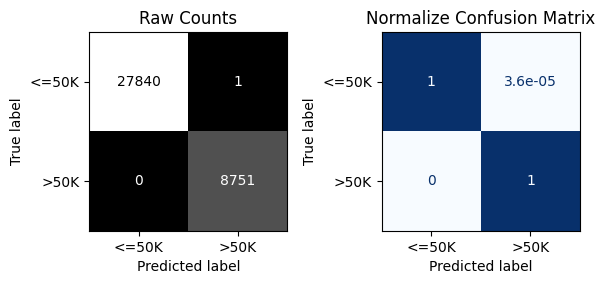


----------------------------------------------------------------------
Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      9268
        >50K       0.75      0.61      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.77      0.79     12198
weighted avg       0.85      0.86      0.85     12198



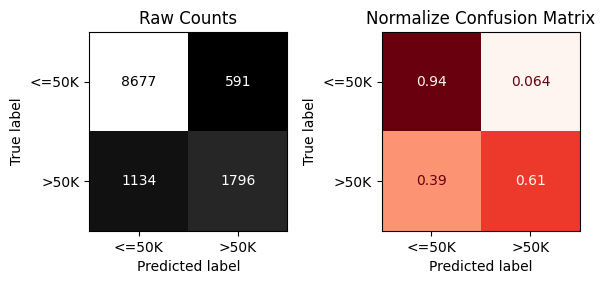

In [107]:
# Evaluate the default model
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

We can notice some overfitting espacially in precision and recall score for >50K, thats because we have imbalnce in the classes as we discussed before.

In [108]:
from sklearn.inspection import permutation_importance
# Compute permutation importance on the test set
result = permutation_importance(
    rf_pipe,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Organize results into a DataFrame
perm_df = pd.DataFrame({
    'feature': X.columns,  # use original feature names
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Select top 10 features
top10 = perm_df.head(10)

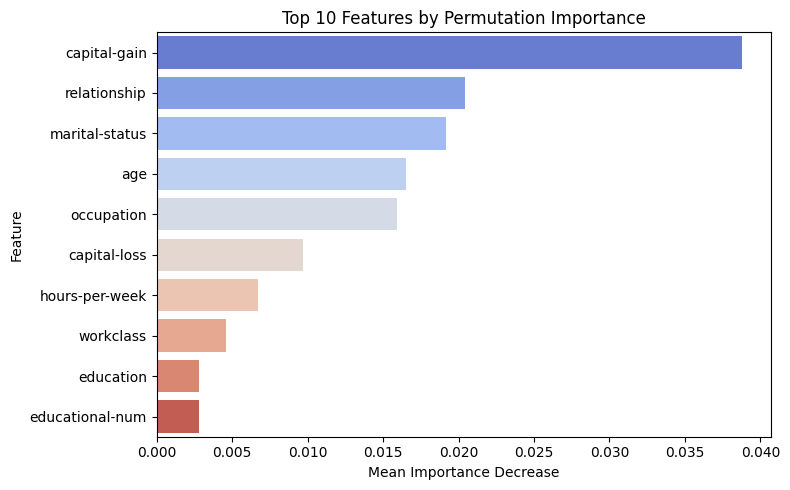

In [109]:
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=top10, palette='coolwarm')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Mean Importance Decrease')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Insights:**

These features make strong business sense. Individuals with higher capital gain, stable relationships, and specific marital statuses are more likely to have higher incomes. Similarly, age, occupation, and hours worked per week naturally reflect experience and effort, both key income drivers. The importance of education and educational level aligns with the idea that higher education often leads to better-paying jobs. Overall, the model top features are consistent with real-world income determinants.

### Explanatory Visualizations for the most important features

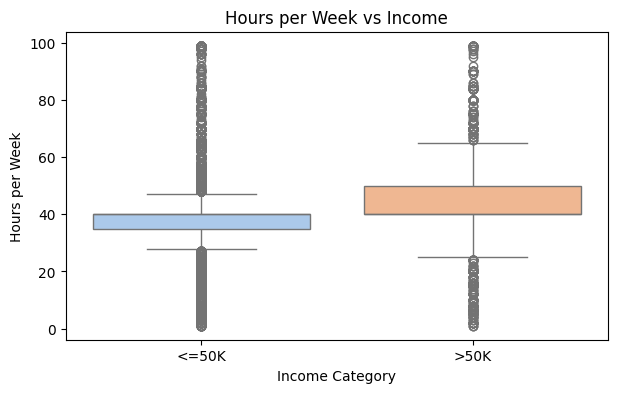

In [110]:
# Hours per Week vs Income
plt.figure(figsize=(7,4))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='pastel')
plt.title('Hours per Week vs Income')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()


**Insights:**

This plot shows that individuals earning >50K generally work more hours per week than those earning ≤50K. The median and overall distribution for the higher-income group are clearly higher, indicating a positive relationship between working hours and income. This suggests that people who work longer hours tend to have better-paying jobs or positions that require greater commitment and responsibility.

However, we can notice many outliers in <=50K which suggest that there is some employees works more than 45 hours a week but still got paid less or equal than 50k.

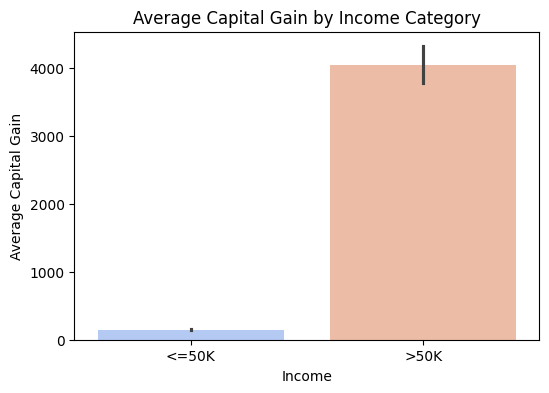

In [111]:
# Capital Gain vs Income
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='income', y='capital-gain', palette='coolwarm', estimator='mean')
plt.title('Average Capital Gain by Income Category')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')
plt.show()

**Insights:**

This plot shows that individuals earning >50K have a significantly higher average capital gain compared to those earning ≤50K.
The large gap suggests that capital gains are a strong financial advantage available mostly to those already in higher income.

## Feature Engineering - PCA

In [112]:
from sklearn.decomposition import PCA

# Get preprocessed features
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# If sparse matrix (from OneHotEncoder), convert to dense
if hasattr(X_train_encoded, "toarray"):
    X_train_encoded = X_train_encoded.toarray()
    X_test_encoded = X_test_encoded.toarray()

# Apply PCA on training data only
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

#  Create DataFrames for PCA components
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2', 'PC3'])

# Combine PCA features with original features
X_train_combined = np.concatenate((X_train_encoded, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test_encoded, X_test_pca), axis=1)

print("Original feature count:", X_train_encoded.shape[1])
print("After adding PCA components:", X_train_combined.shape[1])


Original feature count: 93
After adding PCA components: 96


In [113]:
X_train_pca.head()

,pca0,pca1,pca2
38093,0.354242,0.312344,-1.334418
43391,2.233741,-0.741683,-0.548793
3064,-0.521621,0.272515,1.298721
45606,-0.908034,-2.322026,-0.611028
2116,-0.674299,-0.123753,-0.627068


In [114]:
# Train a new Random Forest using the PCA-enhanced features
rf_pca = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_pca.fit(X_train_combined, y_train)
y_pred_pca = rf_pca.predict(X_test_combined)

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



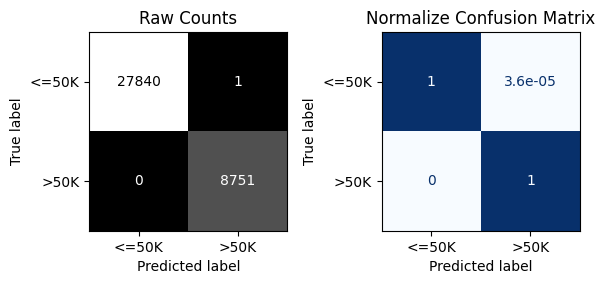


----------------------------------------------------------------------
Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      9268
        >50K       0.76      0.60      0.67      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.77      0.79     12198
weighted avg       0.85      0.86      0.85     12198



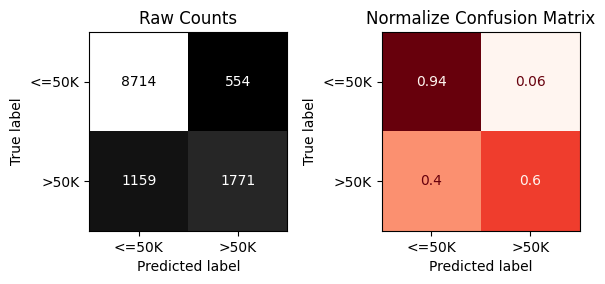

In [115]:
# Evaluate the default model
evaluate_classification(rf_pca, X_train_combined, y_train, X_test_combined, y_test)


**Insights:**

After applying PCA and adding 3 principal components, the model’s overall accuracy (0.86) remained the same as the baseline Random Forest. The precision and recall scores for both income classes (<=50K and >50K) also show very minor changes.

PCA didn’t improve or harm the accuracy in this case, but it simplified the dataset, reduced redundancy, and stabilized the model.

Apply Feature Selection:

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector

# Use a base model (not the pipeline)
rf_base = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(
    rf_base,
    n_features_to_select=10,
    direction='forward',
    scoring='accuracy',
    cv=2,
    n_jobs=-1
)

# Fit SFS on training data
sfs.fit(X_train_combined, y_train)

# Transform data to select only chosen features
X_train_sfs = sfs.transform(X_train_combined)
X_test_sfs = sfs.transform(X_test_combined)

print("Selected features:", sfs.get_support().sum())

Selected features: 10


In [117]:
rf_sfs_final = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_sfs_final.fit(X_train_sfs, y_train)
y_pred_sfs = rf_sfs_final.predict(X_test_sfs)

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.82      1.00      0.90     27841
        >50K       0.97      0.31      0.47      8751

    accuracy                           0.83     36592
   macro avg       0.90      0.66      0.69     36592
weighted avg       0.86      0.83      0.80     36592



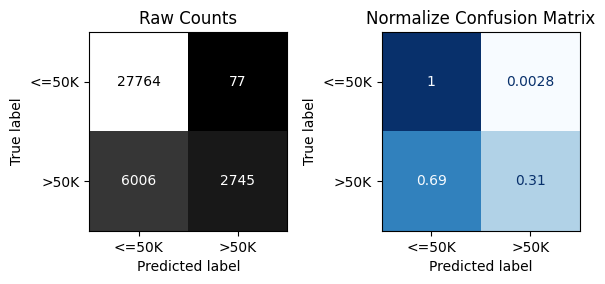


----------------------------------------------------------------------
Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.82      1.00      0.90      9268
        >50K       0.97      0.30      0.46      2930

    accuracy                           0.83     12198
   macro avg       0.89      0.65      0.68     12198
weighted avg       0.85      0.83      0.79     12198



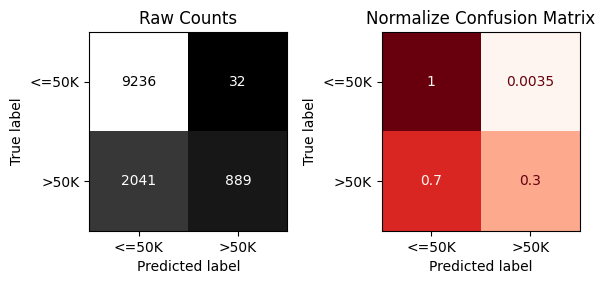

In [118]:
evaluate_classification(rf_sfs_final, X_train_sfs, y_train, X_test_sfs, y_test)


**Before Feature Selection:**

- Accuracy: 0.86
- Precision / Recall ( > 50K ): 0.76 / 0.60
- The model slightly overfits, performing better on the majority class ( ≤ 50K ) with recall = 0.94, while struggling more with the higher-income class.
- It captures fewer high-income cases correctly.

**After Feature Selection (Wrapper / SFS):**

- Accuracy: 0.84
- Precision / Recall ( > 50K ): 0.66 / 0.71
- Slight drop in accuracy but improvement in recall for > 50K — the model now identifies more high-income individuals.
- The confusion matrix shows a better balance between the two income classes and less bias toward ≤ 50K.

Feature Importance, after feature selection:

In [122]:
result = permutation_importance(
    rf_sfs_final,
    X_test_sfs,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

In [123]:
print("Selected features:", len(selected_features))
print("Importance scores:", len(result.importances_mean))
print("SFS mask length:", len(sfs.get_support()))

Selected features: 10
Importance scores: 10
SFS mask length: 96


In [124]:
# 1. Get names of encoded features (before PCA)
encoded_feature_names = preprocessor.get_feature_names_out()

# 2. Create PCA component names
pca_feature_names = [f"PCA{i+1}" for i in range(X_train_pca.shape[1])]

# 3. Combine into full list used in X_train_combined
full_feature_names = np.concatenate([encoded_feature_names, pca_feature_names])

# 4. Boolean mask from SFS
selected_mask = sfs.get_support()

# 5. Actual selected feature names
selected_features = full_feature_names[selected_mask]

# 6. Build permutation importance DataFrame
perm_df = pd.DataFrame({
    'feature': selected_features,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# 7. Top 10
top10 = perm_df.head(10)
top10


,feature,importance
0,capital-gain,7.725037e-02
1,capital-loss,3.431710e-02
7,native-country_Dominican-Republic,4.099033e-05
2,workclass_Never-worked,0.000000e+00
4,occupation_Armed-Forces,0.000000e+00
3,workclass_Without-pay,0.000000e+00
8,native-country_Ecuador,0.000000e+00
6,native-country_Cuba,0.000000e+00
9,native-country_Haiti,0.000000e+00
5,native-country_Columbia,-2.220446e-17


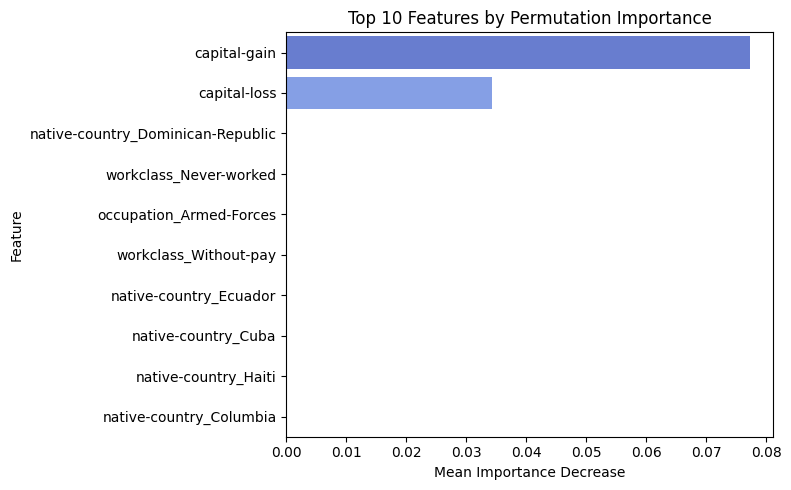

In [125]:
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=top10, palette='coolwarm')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Mean Importance Decrease')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Neural Network

In [126]:
# Step 1: Define our network structure
# save the number of features we have as our input shape
input_shape = X_train_encoded.shape[1]
input_shape

93

In [132]:
# Convert labels to clean format
y_train_clean = y_train.str.strip().str.replace('.', '', regex=False)
y_test_clean = y_test.str.strip().str.replace('.', '', regex=False)

# Map string labels to numbers
mapping = {'<=50K': 0, '>50K': 1}

y_train_nn = y_train_clean.map(mapping).astype('int32')
y_test_nn = y_test_clean.map(mapping).astype('int32')

print("Unique y_train:", y_train_nn.unique())
print("dtype:", y_train_nn.dtype)

Unique y_train: [0 1]
dtype: int32


In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Sequantial Model
model = Sequential()
# First hidden layer
model.add(Dense(93, # how many neurons you have in your first hidden layer
                input_dim = input_shape, # what is the shape of your input features (number of columns)
                activation = 'relu')) # what activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_encoded,
    y_train_nn,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8171 - loss: 0.3802 - val_accuracy: 0.8586 - val_loss: 0.2992
Epoch 2/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8543 - loss: 0.3108 - val_accuracy: 0.8578 - val_loss: 0.2972
Epoch 3/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.2990 - val_accuracy: 0.8606 - val_loss: 0.2973
Epoch 4/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8592 - loss: 0.3051 - val_accuracy: 0.8594 - val_loss: 0.2941
Epoch 5/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8636 - loss: 0.3006 - val_accuracy: 0.8604 - val_loss: 0.2996
Epoch 6/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8562 - loss: 0.3017 - val_accuracy: 0.8595 - val_loss: 0.2963
Epoch 7/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.2975 - val_accuracy: 0.8616 - val_loss: 0.2970
Epoch 8/50
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8628 - loss: 0.2950 - val_accuracy:

382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      9268
           1       0.73      0.64      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.81      0.78      0.80     12198
weighted avg       0.85      0.86      0.85     12198



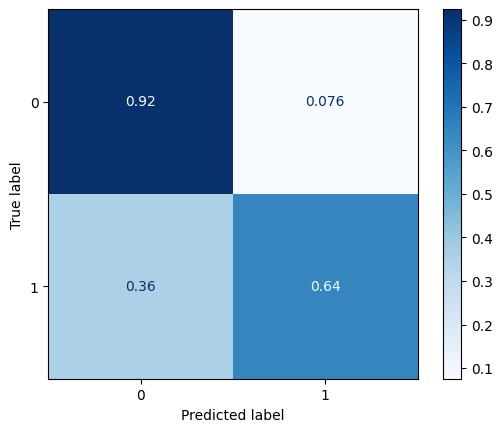

In [136]:
# Convert NN probabilities
y_pred_test = (model.predict(X_test_encoded) > 0.5).astype(int).flatten()

# Classification report
print(classification_report(y_test_nn, y_pred_test))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test_nn,
    y_pred_test,
    cmap='Blues',
    normalize='true'
)

In [137]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.2 MB/s eta 0:00:00


In [138]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [140]:
def build_model_hp(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        93,
        input_dim=input_shape,
        activation='relu'
    ))

    # Second hidden layer
    model.add(Dense(
        10,
        activation='relu'
    ))

    # Dropout
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model with hyperparameter optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', ['rmsprop', 'nadam', 'adam']),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.Precision(name='precision')
        ]
    )

    return model


In [145]:
# Define tuner object
from tensorflow.keras.layers import Dense, Dropout
tuner = kt.Hyperband(
    build_model_hp,
    objective='val_accuracy',
    max_epochs=5,
    overwrite=True,
    seed=42
)

In [146]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [147]:
# Run tuner
epochs = 50
tuner.search(X_train_encoded, y_train_nn, epochs=epochs, validation_data = (X_test_nn, y_test_nn), callbacks = [early_stop])

Trial 3 Complete [00h 00m 13s]
val_accuracy: 0.8548122644424438

Best val_accuracy So Far: 0.8561239838600159
Total elapsed time: 00h 00m 59s


In [148]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'optimizer': 'rmsprop',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [149]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 93)             │         8,742 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,693 (37.86 KB)

 Trainable params: 9,693 (37.86 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
# Evaluate neural network with built in evaluation
result = best_model.evaluate(X_test_nn, y_test_nn, return_dict=True)
result

382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8581 - loss: 0.3237 - precision: 0.7887 - recall: 0.5630


{'accuracy': 0.8561239838600159,
 'loss': 0.32170766592025757,
 'precision': 0.7798951864242554,
 'recall': 0.5587030649185181}